In [1]:
import pandas as pd
import seaborn as sns
from  sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import tree
import altair as alt
%matplotlib inline 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from imblearn.ensemble import BalancedBaggingClassifier
from  sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble    import ExtraTreesClassifier
from sklearn.linear_model import Ridge,lars_path,LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
HRData=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")


In [3]:
HRData.head(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0


In [4]:
HRData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [ ]:
# Try to visualize data

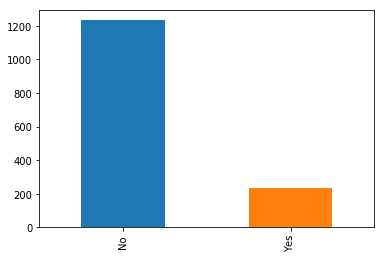

In [5]:
pd.Series(HRData['Attrition'].value_counts()).plot(kind='bar')

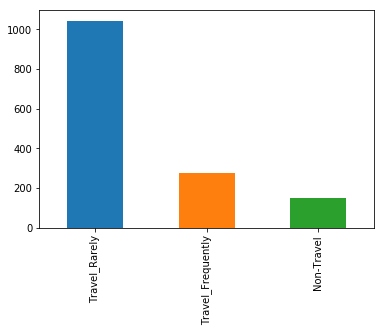

In [6]:
pd.Series(HRData['BusinessTravel'].value_counts()).plot(kind='bar')

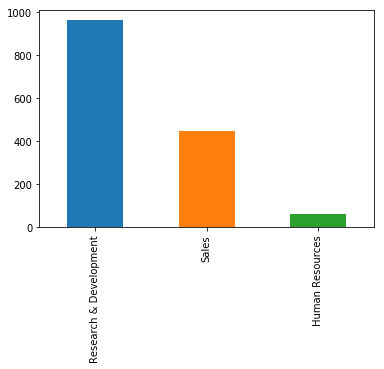

In [7]:
pd.Series(HRData['Department'].value_counts()).plot(kind='bar')


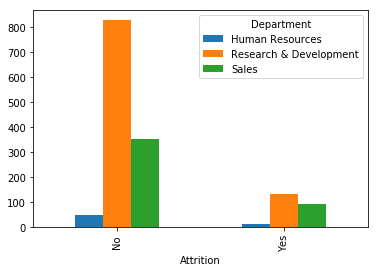

In [8]:
HRData.pivot_table(index='Attrition',columns='Department',aggfunc='count')['Age'].plot(kind='bar')

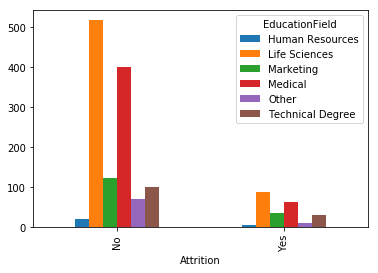

In [9]:
HRData.pivot_table(index='Attrition',columns='EducationField',aggfunc='count')['Age'].plot(kind='bar')

C:\Users\Abolfazl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


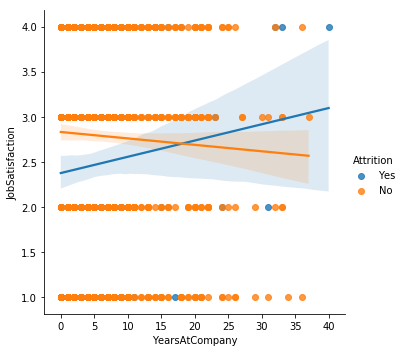

In [13]:
sns.lmplot(x="YearsAtCompany", y="JobSatisfaction", hue="Attrition",
               truncate=True, data=HRdata)

In [12]:
HRData.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

In [79]:
HRData.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [14]:
# Handling categorical data
HRdata=pd.get_dummies(data=HRData, columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'])

In [15]:
# preparing test train sets
x=HRdata.select_dtypes(include=['int64','uint8'])

In [17]:
y=HRdata['Attrition'].ravel()

In [18]:
# Binarizing y
lb = preprocessing.LabelBinarizer()
y=lb.fit_transform(y)

In [19]:
# Spilt data
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

In [32]:
# Models
DTC=DecisionTreeClassifier()
RFC=RandomForestClassifier()
ETC=ExtraTreesClassifier()
LR=LogisticRegression()
Bag=BaggingClassifier(base_estimator=DTC,n_estimators=30,bootstrap=True,n_jobs=-1)
adaboost=AdaBoostClassifier(base_estimator=DTC)
adaboostrandomforest=AdaBoostClassifier(base_estimator=RFC)
gb=GradientBoostingClassifier()
Bbc=BalancedBaggingClassifier(base_estimator=DTC)


In [ ]:
# fit model on training dataset
Model=[BernoulliNB(),GaussianNB(),Bbc,adaboostrandomforest,adaboost,Bag,DTC,ETC,LR,RFC,gb]

TestModels = pd.DataFrame()
tmp = {}
for model in Model:
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
        
    model.fit(x_train,y_train.ravel())
   
    tmp['score'] = np.mean(cross_val_score(model,x_train,y_train,cv=10))
    tmp['roc_auc_score'] = roc_auc_score(y_test.ravel(),model.predict(x_test))
    TestModels=TestModels.append([tmp])
        
   
   
   

In [26]:
# Result
TestModels

,Model,roc_auc_score,score
0,BernoulliNB,0.685085,0.827023
0,GaussianNB,0.695494,0.729802
0,BalancedBaggingClassifier,0.662908,0.784314
0,AdaBoostClassifier,0.556793,0.849391
0,AdaBoostClassifier,0.570651,0.763802
0,BaggingClassifier,0.597540,0.857167
0,DecisionTreeClassifier,0.577314,0.780354
0,ExtraTreesClassifier,0.598230,0.857139
0,LogisticRegression,0.659734,0.868818
0,RandomForestClassifier,0.586205,0.851314


C:\Users\Abolfazl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


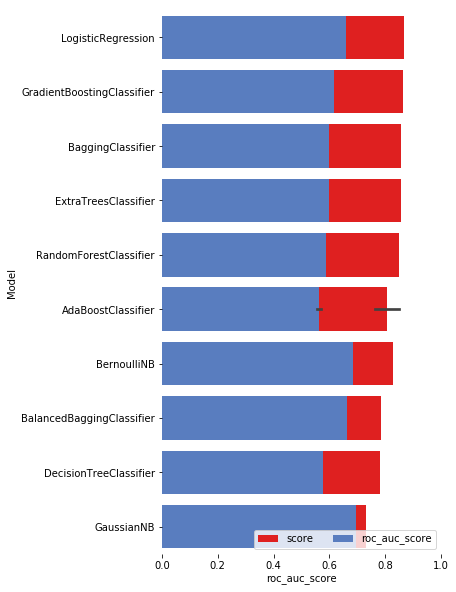

In [27]:
# Ploting result
f, ax = plt.subplots(figsize=(5, 10))
sns.barplot(x="score", y="Model", data=TestModels.sort_values(by='score',ascending=False),
            label="score", color="r")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Model scores")
sns.despine(left=True, bottom=True)
sns.set_color_codes("muted")
sns.barplot(x="roc_auc_score", y="Model", data=TestModels.sort_values(by='score',ascending=False),
            label="roc_auc_score", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)


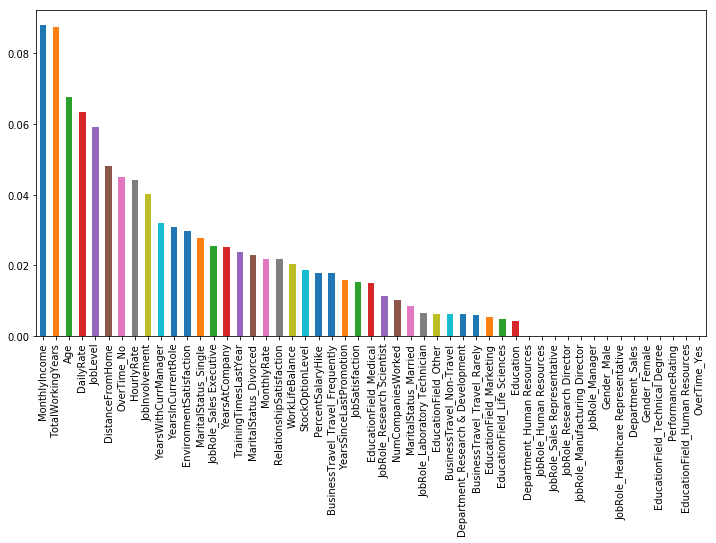

In [28]:
#Extracting important features
pd.Series(DTC.feature_importances_,index=x_train.columns).sort_values(ascending=False).plot(kind='bar',figsize=(12,6))

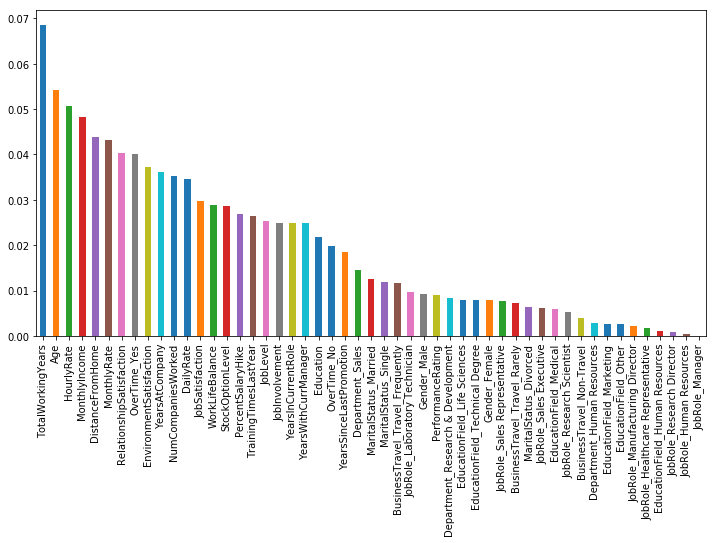

In [29]:
#Extracting important features
pd.Series(RFC.feature_importances_,index=x_train.columns).sort_values(ascending=False).plot(kind='bar',figsize=(12,6))

C:\Users\Abolfazl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abolfazl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abolfazl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abolfazl\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

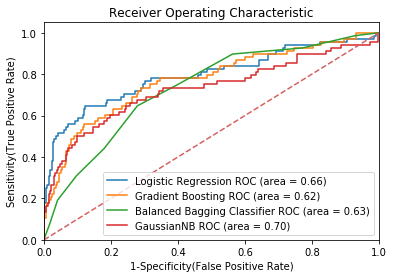

In [41]:
# ROC Curve For some models
models = [
{
    'label': 'Logistic Regression',
    'model': LR,
},
{
    'label': 'Gradient Boosting',
    'model': gb,
},
 {  
     'label': 'Balanced Bagging Classifier',
    'model': Bbc},
{ 'label': 'GaussianNB',
    'model': GaussianNB(),}
]


for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test)

    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])

    auc = metrics.roc_auc_score(y_test,model.predict(x_test))

    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display